In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [2]:
bkm = pd.read_csv('bkmkitaplar5.csv', index_col=0)
bkm.sample(3)

,Product_Name,Publisher,Writer,Previous_Price,Discount,Current_Price,Gain,Kind,Page,ISBN,Cover
1456,Tuhaf Canavar Cancan,Yapı Kredi Yayınları,Manuela Monari,"5,56",%36 indirim,"3,56","2,00",Roman-Öykü Kitapları,48,9789750842092,Ciltsiz
2509,Fizik Öğretiminde Problem Çözme,Cezve Kitap,Elif İnce,"20,00",%36 indirim,"12,80","7,20",Akademik Kitaplar,144,9786058217669,Ciltsiz
1572,Antik Yunan'ın Kısa Tarihi,Alfa Yayınları,Sarah B. Pomeroy,"45,00",%35 indirim,"29,25","15,75",Diğer Tarih Kitapları,400,9786051716855,Ciltsiz


In [4]:
bkm.tail(3)

,Product_Name,Publisher,Writer,Previous_Price,Discount,Current_Price,Gain,Kind,Page,ISBN,Cover
2549,Askerlik İşi,İletişim Yayınevi,Erik Jan Zürcher,"65,00",%30 indirim,"45,50","19,50",Referans - Kaynak Kitapları,664,9789750522741,Ciltsiz
2550,Putin Ne İstiyor?,İletişim Yayınevi,Jean-Robert Jouanny,"29,50",%30 indirim,"20,65","8,85",Dünya Siyaseti ve Politikası Kitapları,174,9789750522697,Ciltsiz
2551,Uyku Sersemi,İletişim Yayınevi,Hakan Bıçakcı,"27,00",%30 indirim,"18,90","8,10",Türk Edebiyatı,180,9789750522611,Ciltsiz


In [5]:
bkm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2552 entries, 0 to 2551
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_Name    2552 non-null   object
 1   Publisher       2552 non-null   object
 2   Writer          2552 non-null   object
 3   Previous_Price  2552 non-null   object
 4   Discount        2552 non-null   object
 5   Current_Price   2552 non-null   object
 6   Gain            2552 non-null   object
 7   Kind            2552 non-null   object
 8   Page            2552 non-null   int64 
 9   ISBN            2552 non-null   int64 
 10  Cover           2552 non-null   object
dtypes: int64(2), object(9)
memory usage: 239.2+ KB


In [6]:
bkm['Current_Price']=bkm['Current_Price'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)
bkm['Previous_Price']=bkm['Previous_Price'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)
bkm['Gain']=bkm['Gain'].str.replace('[A-Za-z]', '').str.replace('.', '').str.replace(',', '.').astype(float)

In [24]:
#bkm['Discount']=bkm['Discount'].str.replace('%', '').str.replace('indirim', '').astype(float)

In [21]:
bkm['Cover']=bkm['Cover'].str.replace('Ciltli', '1')
bkm['Cover']=bkm['Cover'].str.replace('Ciltsiz', '0')

In [22]:
bkm.head(3)

,Product_Name,Publisher,Writer,Previous_Price,Discount,Current_Price,Gain,Kind,Page,ISBN,Cover
0,Eğitici Kartlar - Resimli Bulmacalar,Teleskop Popüler Bilim,Kolektif,25.0,50.0,12.50,12.50,Zeka Gelişimi Kitapları,1,9786052520130,0
1,Psikoloji Nasıl Çalışır,Alfa Yayınları,Kolektif,125.0,35.0,81.25,43.75,Popüler Kültür Kitapları,258,9786051068695,1
2,Eğitici Kartlar - Çocuklarla 100 Etkinlik,Teleskop Popüler Bilim,Kolektif,25.0,50.0,12.50,12.50,Zeka Gelişimi Kitapları,1,9786052520154,0


In [40]:
sum(bkm['Kind'].value_counts().head(10))

1480

In [54]:
sum(bkm['Writer'].value_counts().head(1))

171

In [44]:
sum(bkm['Publisher'].value_counts().head(8))

1510

* ISBN at
* ücretler ve indirimlerden 1 ini bırak
* Publisherların ortalama fiyatlarına bak
* Kitap sayısına göre sayfa sayısına bak yazarların
* Türlere göre sayı ve sayfa

* Belli Yayınevleri ve Belli yazarlara ve belli türlere göre
* Sayfa Sayısına göre fiyat

In [68]:
bkm.sample(3)

,Product_Name,Publisher,Writer,Previous_Price,Discount,Current_Price,Gain,Kind,Page,ISBN,Cover
1779,Duino Buluşması,Yapı Kredi Yayınları,Bedirhan Toprak,20.37,36.0,13.04,7.33,Şiir Kitapları,180,9789750841668,0
1735,Devlet Aklı ve 1915,İletişim Yayınevi,Ömer Turan,53.00,30.0,37.10,15.90,Tarih Araştırma - İnceleme Kitapları,438,9789750523496,0
1357,Castellio Calvin'e Karşı ya da Bir Vicdan Zorb...,İletişim Yayınevi,Stefan Zweig,25.00,30.0,17.50,7.50,Roman,241,9789750524295,0


In [58]:
pt1 = bkm.pivot_table(index='Kind', values=['Current_Price'])
pt1.head(10)

,Current_Price
Kind,
Akademik Kitaplar,15.875000
Aksiyon - Macera Kitapları,13.000000
Alman Edebiyatı Kitapları,21.020000
Amerikan Edebiyatı,14.720000
Anlatı Kitapları,14.862353
Annelik ve Çocuk Bakımı Kitapları,13.000000
Antoloji Kitapları,25.885000
Antropoloji Kitapları,19.970000
Anı- Mektup - Günlük Kitapları,18.532069


In [60]:
print(len(bkm["Page"].unique()))
print(len(bkm["Publisher"].unique()))
print(len(bkm["Writer"].unique()))
print(len(bkm["Kind"].unique()))

457
44
1538
188


In [61]:
print(bkm["Discount"].value_counts().sort_values(ascending=False).head(8))

35.0    917
40.0    451
36.0    414
30.0    223
50.0    190
38.0    116
31.0     73
33.0     30
Name: Discount, dtype: int64


In [62]:
print(bkm["Current_Price"].value_counts().sort_values(ascending=False).head(10))

12.35    64
10.40    61
24.05    55
13.00    54
5.00     48
19.50    48
11.70    44
16.90    43
20.15    42
15.60    40
Name: Current_Price, dtype: int64


In [30]:
print(bkm["Kind"].value_counts().sort_values(ascending=False).head(20))

Roman                                   665
Roman-Öykü Kitapları                    209
Hikayeler                               165
Öykü Kitapları                          108
Denemeler                                65
Diğer                                    59
Türk Edebiyatı                           56
Şiir Kitapları                           54
Kişisel Gelişim Kitapları                52
Çizgi Roman Kitapları                    47
Araştıma-İnceleme Kitapları              47
Popüler Bilim Kitapları                  46
Tarih Araştırma - İnceleme Kitapları     44
Araştırma-İnceleme Kitapları             37
Masallar                                 30
Araştırma - İnceleme Kitapları           30
Anı- Mektup - Günlük Kitapları           29
Biyografi-Otobiyogafi Kitapları          27
Bilimsel Kitaplar                        26
Klasik Kitaplar                          24
Name: Kind, dtype: int64


In [31]:
print(bkm["Writer"].value_counts().sort_values(ascending=False).head(10))

Kolektif                  171
Sir Arthur Conan Doyle     18
Stefan Zweig               17
Ömer Sevinçgül             16
Mehmet Kemal Erdoğan       14
Samed Behrengi             13
Quixot Publishing          12
Metin Karabaşoğlu          11
Demet Küçük                11
Simeon Marinkovic          11
Name: Writer, dtype: int64


In [65]:
bkm_top10 = bkm.groupby("Writer").sum().sort_values("Page",ascending=False).head(5)
bkm_top10 = bkm_top10.reset_index()
bkm_top10

,Writer,Previous_Price,Discount,Current_Price,Gain,Page,ISBN
0,Kolektif,3739.9,6985.0,2261.47,1478.46,15839,1568010611738832
1,Jules Verne,588.0,316.0,362.57,225.43,7872,82286050952458
2,Alexandra Bracken,327.5,200.0,196.50,131.00,5320,48930275173429
3,Sir Arthur Conan Doyle,368.5,652.0,234.40,134.10,3969,176148958470771
4,Philip K. Dick,350.0,350.0,227.50,122.50,3942,97860516518423


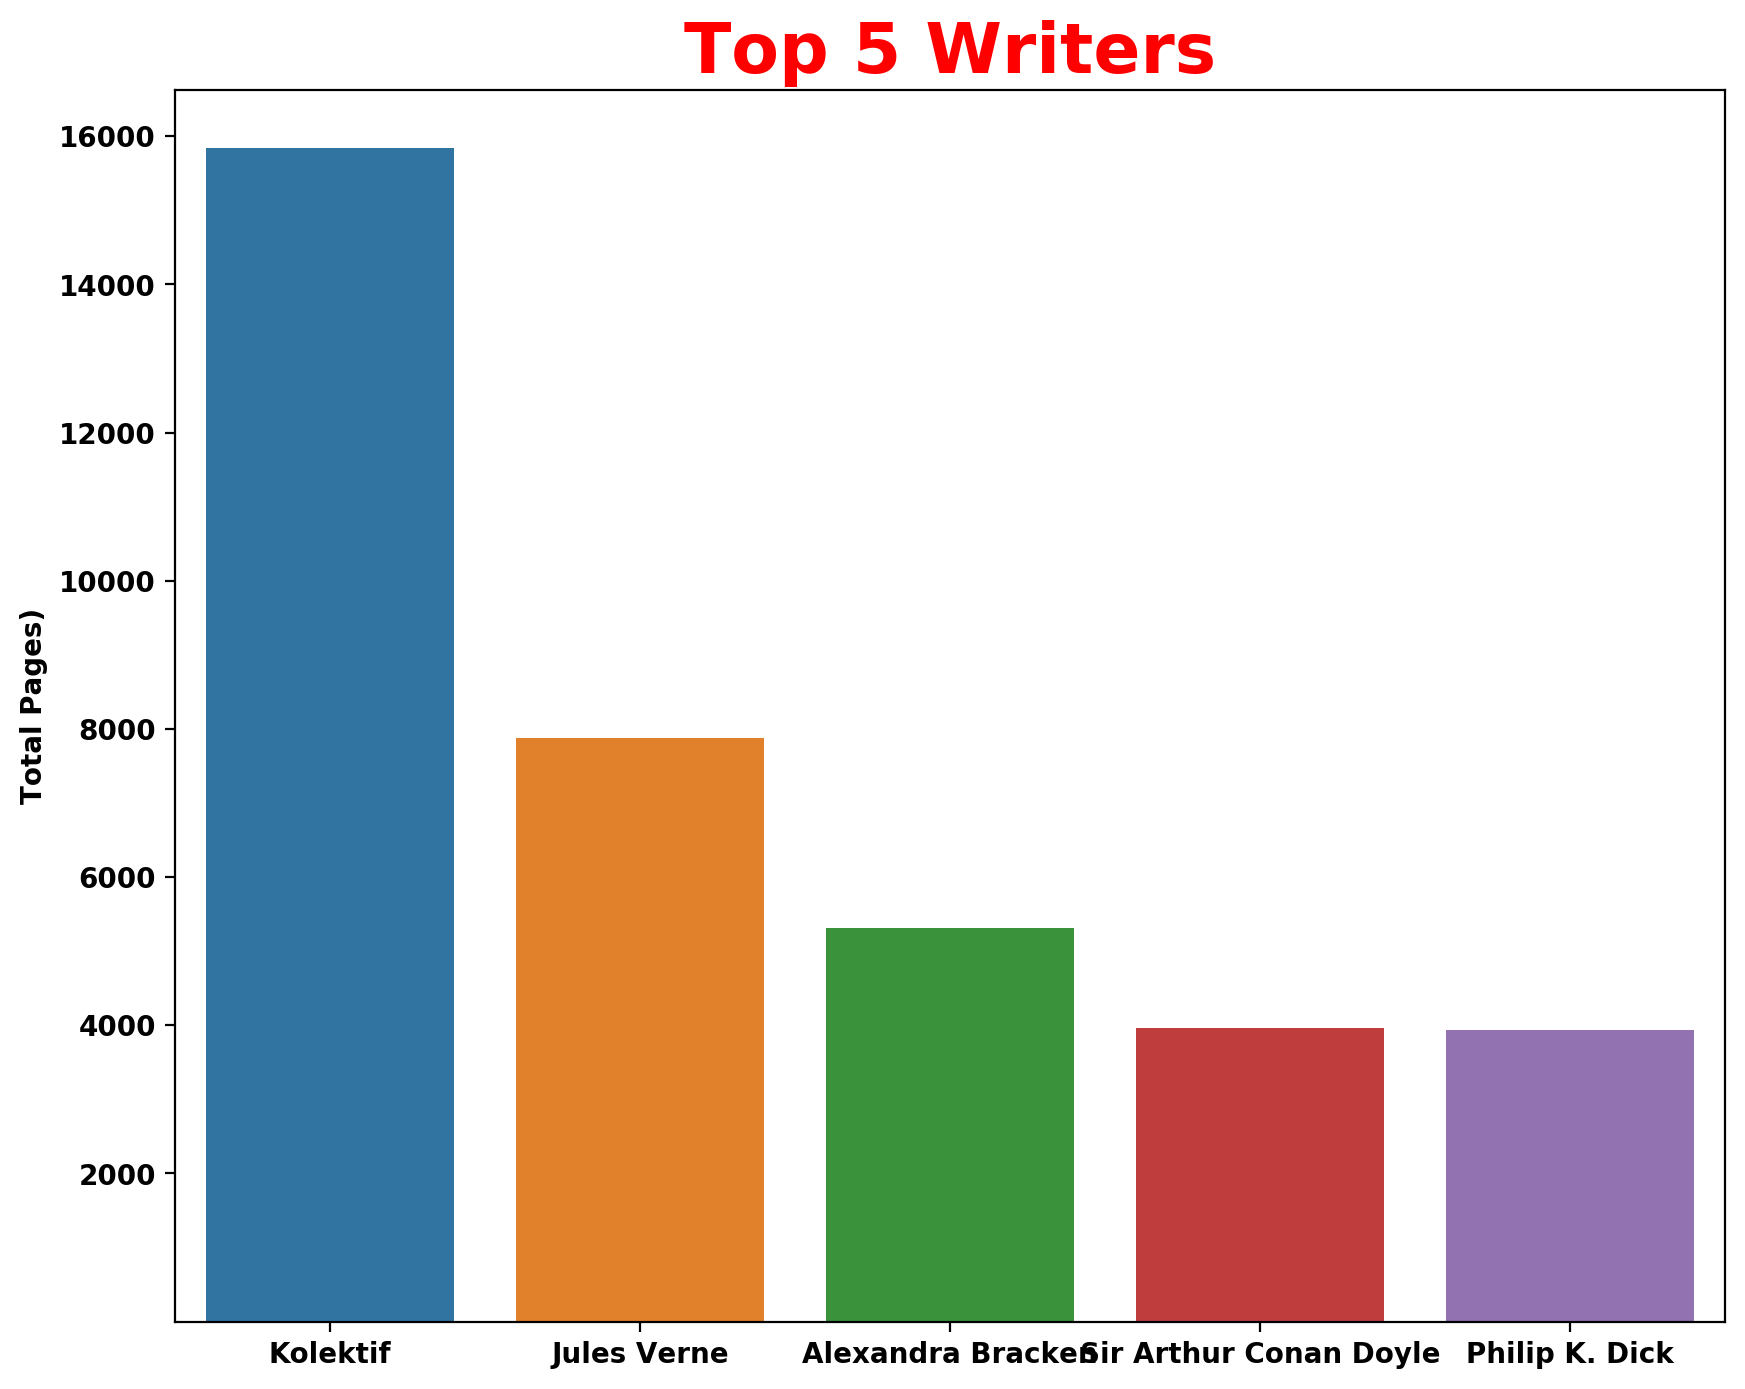

In [66]:
plt.figure(figsize=(10,8),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="Writer", y="Page", data=bkm_top10)
plt.title("Top 5 Writers", weight="bold", c="red", fontsize=25)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Pages)",weight= "bold",c="k")
plt.ylim(1)
plt.yticks(weight="bold")

plt.show()